# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.690796e+01     1.445286e+01
 * time: 0.0016400814056396484
     1     3.128771e+01     9.120481e+00
 * time: 0.00654911994934082
     2     2.593191e+01     5.224896e+00
 * time: 0.012688159942626953
     3     2.092996e+01     2.538402e+00
 * time: 0.05173516273498535
     4     1.919865e+01     2.574036e+00
 * time: 0.056307077407836914
     5     1.864225e+01     1.646619e+00
 * time: 0.06088399887084961
     6     1.816317e+01     1.166397e+00
 * time: 0.06508302688598633
     7     1.790673e+01     1.006338e+00
 * time: 0.06898307800292969
     8     1.765959e+01     9.674599e-01
 * time: 0.07284903526306152
     9     1.748125e+01     6.805225e-01
 * time: 0.07666516304016113
    10     1.737210e+01     4.522810e-01
 * time: 0.0805060863494873
    11     1.731254e+01     8.273449e-01
 * time: 0.0838460922241211
    12     1.729703e+01     7.900223e-01
 * time: 0.08703804016113281
    13     1.726032e+01     6.044996e-01
 * tim

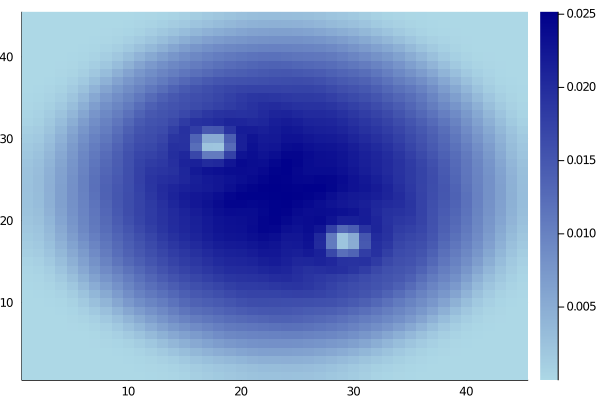

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)